In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import matplotlib as mpl
from ipynb.fs.full.NS_init import *;
from ipynb.fs.full.com_dynamics import *;
from ipynb.fs.full.kernels import *;
from ipynb.fs.full.misc import plot_fig;
from ipynb.fs.full.tests import test_plot_kernels;

mpl.rc('font',family='Times New Roman')

/Users/alexastewart/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Initializing...
R =  13 , M= 1


# View Simulation Plot

In [3]:
kt = "gaussian"
params={"k":10,"n":1,"nu":1}

In [4]:
star1 = NS_("mystar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False,kernel_type=kt)
star2 = NS_("mysecondstar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False,kernel_type=kt)
star2.com = [8,0,0]
star1.com = [-8,0,0]
combined_star = star1.combine(star2)
print(combined_star.num_points)
tEnd = 800
print(kt)
combined_star.kernel_type = kt
com_list = get_com_lists(R = 10)
combined_star.plot_init=True
#combined_star.update_star_new(tag=kt,plotRealTime=True,dt = 0.5,COM_POSITIONS=com_list,params=params)

Initializing...
R =  13 , M= 1
Initializing...
R =  13 , M= 1
800
gaussian


In [5]:
#star1 = NS_("mystar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False)
# star2_low = NS_("mysecondstar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False)
# star2.com = [8,0,0]
# star1.com = [-8,0,0]
# combined_star = star1.combine(star2)
# print(combined_star.num_points)
# tEnd = 800
# kt= star1.kernel_type
# print(kt)

# Plot

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
def test_plot_vars(p_titles,paramss,init = True, keys = ["acc"],ylimits=False, hs=[0.01],ks = ["faber","cubic_spline","wendland_4","wendland_2","gaussian"],times = [(0.001,.02)],num_points=200,plot=False): #,(0.01,.2),(0.0001,.002),(.1,2),(1,20)] # (dt, tEnd)
    KERNELS="-".join(np.copy(ks))
    VARS =""
    ylims = {"acc": (0,10), "dAdt": (0,10),"visc": (0,0.3),"pos":(-12,12),"rho":(0,4000),"grav":(0,0.01),"Pressure":(0,0.01),"(P - grav force)":(0,0.03)}
    ## Test initialization!
    kern_plot = {}
    kt = ks[0]
    for h in hs:
        print("\n ******* SUMMARY ******** \n")
        for time in times:
            for params in paramss:
                filename="test_get_acc_h=" + str(h) + "dt="+ str(time[0])+ "End=" +str(time[1])
                #eos = EOS("polytropic")
                star1 = NS_("mystar", mass = 1, radius = 12, num_points = num_points,plot_initialized_star=False,kernel_type=kt,prt=True)
                if init:
                    pass
                else:
                    star1 = NS_("mystar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False,kernel_type=kt,params=params)
                    star2 = NS_("mysecondstar", mass = 1, radius = 13, num_points = 400,plot_initialized_star=False,kernel_type=kt,params=params)
                    star2.com = [8,0,0]
                    star1.com = [-8,0,0]
                    combined_star = star1.combine(star2)
                    print(combined_star.num_points)
                    tEnd = 800
                    print(kt)
                    combined_star.kernel_type = kt
                    com_list = get_com_lists(R = 10)
                    combined_star.plot_init=True
                    combined_star.update_star_new(tag=kt,plotRealTime=True,dt = 0.5,COM_POSITIONS=com_list,params=params)
                kern_plot[str(params)]= star1.test_acc_data
                print(str(params))
                if plot:
                    plot_single_timestep(star1.pos,title=k+" "+str(h))
        d = star1.test_acc_data
        for key in d.keys():
            if key in keys:
                data = []
                for params in paramss:
                    data.append(kern_plot[str(params)][key])   # append data for each kernel
                data = np.asarray(data)
                if ylimits:
                    plt.ylim(ylims[key])
                if key not in ['grav']:
                    csfont = {'fontname':'Times New Roman'}
                    hfont = {'fontname':'Helvetica'}
                    titles= {"acc":"Acceleration","rho":"Density","P":"Pressure","pos":"Position"}
                    
                    k_titles= {"gaussian":"Gaussian","wendland_4":"Wendland 4","wendland_2":"Wendland 2","cubic_spline":"Cubic Spline","faber":"Faber"}
                    print("\nplotting ", titles[key])
                    STYLE =  'seaborn-notebook'#'dark_background'#'_classic_test_patch'#'seaborn-deep'
                    plt.style.use(STYLE)
                    for i in range(len(data)):
                        plt.plot(data[i])
                        TITLE=titles[key]#
                    plt.title(TITLE,loc='right',**csfont)
                    plt.legend([p_titles[str(i)] for i in paramss])
                    plt.ylabel(titles[key])
                    plt.xlabel("Timestep (Code Time)")
                    plt.savefig("plots/var/"+TITLE+", h="+str(h)+"-"+KERNELS+STYLE+".jpeg", dpi=150)
                    plt.show()
                else:
                    pass
                if key in []:#["pos"]:
                    print("making movie")
                    plot(data, "pos_NS_anim_"+k)
                
#                     for i in range(len(data)):
#                         plt.plot(data[i])
#                     plt.title(key+",h="+str(h)+", tFin="+str(time[1]),loc='right')
#                     plt.legend(ks)
#                     plt.show()
                print("\n")
    return star1.test_acc_data

In [8]:
# hi_fid = "$F_x = \\frac{P_x}{rho_i^2}*dW(r) - \\nu$"
# low_fid = "$F_x = \\frac{P_x}{rho_i^2}*dW(r)$"
# paramss=[{"k":10,"n":1,"nu":1},{"k":10,"n":1,"nu":0.0}]
# titles=[hi_fid,low_fid]
# p_titles = {}
# for i in range(len(paramss)):
#     p_titles[str(paramss[i])] = titles[i]
# t = {"0.001":(0.03,500),"0.1":(0.001,1),"1":(0.01,1),"100":(1,100)} # pairs of (dt, tEnd) (timstep, end time)
# endtime = [t["0.001"]] # end time for intiialization
# ks = ["gaussian","cubic_spline","faber","wendland_4"]#,"wendland_2","gaussian"]
# ks = ["gaussian","wendland_4"]#,"wendland_2","gaussian"]
# smoothing_len = [1] # smoothing lengths to test
# key =  ["rho","acc"] # "dAdt","grav","pos"
# data = test_plot_vars(p_titles,paramss,keys = key,hs=smoothing_len,times=endtime,num_points=125,ks=ks,plot=False)


 ******* SUMMARY ******** 

Initializing...
R =  12 , M= 1
{'k': 20, 'n': 1, 'nu': 1}
Initializing...
R =  12 , M= 1
{'k': 10, 'n': 1, 'nu': 1}

plotting  Acceleration


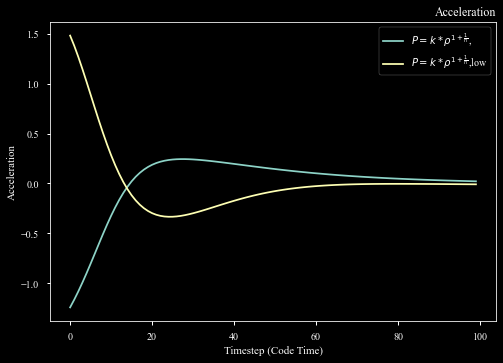




plotting  Density


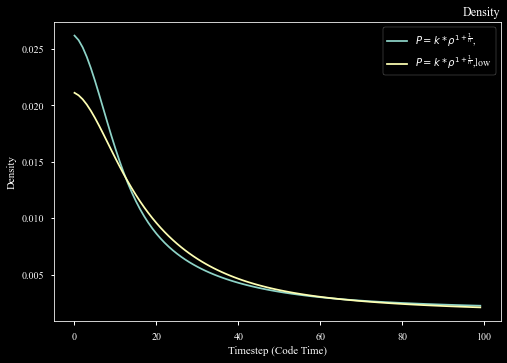

In [13]:
hi_fid = "$P = k*\\rho^{1+\\frac{1}{n}}$, "
low_fid = "$P = k*\\rho^{1+\\frac{1}{n}}$,low"

STYLE = 'dark_background'#'_classic_test_patch'#'seaborn-deep'
plt.style.use(STYLE)

paramss=[{"k":20,"n":1,"nu":1},{"k":10,"n":1,"nu":1}]
titles=[hi_fid,low_fid]
p_titles = {}
for i in range(len(paramss)):
    p_titles[str(paramss[i])] = titles[i]
t = {"0.001":(0.03,500),"0.1":(0.001,1),"1":(0.01,1),"100":(1,100)} # pairs of (dt, tEnd) (timstep, end time)
endtime = [t["0.001"]] # end time for intiialization
ks = ["gaussian","cubic_spline","faber","wendland_4"]#,"wendland_2","gaussian"]
ks = ["gaussian","wendland_4"]#,"wendland_2","gaussian"]
smoothing_len = [1] # smoothing lengths to test
key =  ["rho","acc"] # "dAdt","grav","pos"
data = test_plot_vars(p_titles,paramss,keys = key,hs=smoothing_len,times=endtime,num_points=125,ks=ks,plot=False)


 ******* SUMMARY ******** 

Initializing...
R =  12 , M= 1
Initializing...
R =  12 , M= 1

plotting  Acceleration


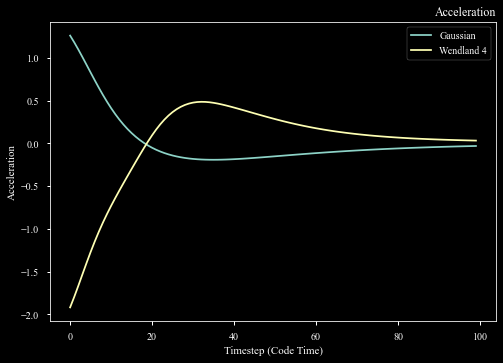




plotting  Density


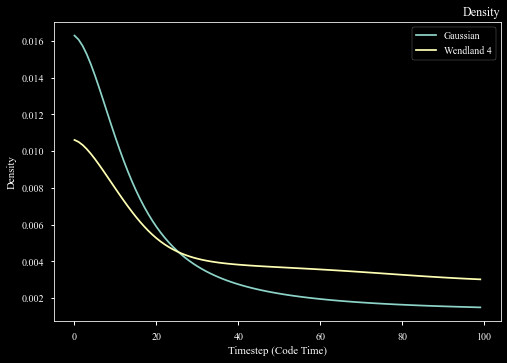

In [19]:
t = {"0.001":(0.03,500),"0.1":(0.001,1),"1":(0.01,1),"100":(1,100)} # pairs of (dt, tEnd) (timstep, end time)
endtime = [t["0.001"]] # end time for intiialization
ks = ["gaussian","cubic_spline","faber","wendland_4"]#,"wendland_2","gaussian"]
ks = ["gaussian","wendland_4"]#,"wendland_2","gaussian"]
smoothing_len = [1] # smoothing lengths to test
key =  ["rho","acc"] # "dAdt","grav","pos"
data = test_plot_kernels(keys = key,hs=smoothing_len,times=endtime,num_points=125,ks=ks,plot=False)

In [65]:
"-".join(["a","b"])

'a-b'

In [14]:
str({"k":10,"n":1,"nu":1})

"{'k': 10, 'n': 1, 'nu': 1}"

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
